In [1]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

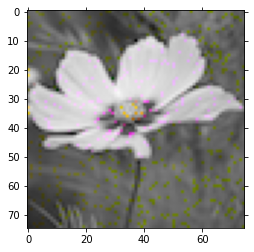

In [27]:
#read in imgage
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

img = mpimg.imread("flower.png")
img = img[:,:,0:3]
m,n,_ = img.shape

np.random.seed(5)
known_ind = np.where(np.random.rand(m,n) >= 0.90)
# grayscale image
M = 0.299*img[:,:,0]+0.587*img[:,:,1]+0.114*img[:,:,2]
# known color values
R_known = img[:,:,0]
G_known = img[:,:,1]
B_known = img[:,:,2]
R_known = R_known[known_ind]
G_known = G_known[known_ind]
B_known = B_known[known_ind]

def save_img(filename, R,G,B):
  img = np.stack((np.array(R),np.array(G),np.array(B)), axis=2)
  # turn off ticks and labels of the figure
  plt.tick_params(
    axis='both', which='both', labelleft='off', labelbottom='off',
    bottom='off', top='off', right='off', left='off'
  )
  fig = plt.imshow(img)
  plt.savefig(filename,bbox_inches='tight',pad_inches=0.)

R_given = np.copy(M);
R_given[known_ind] = R_known;
G_given = np.copy(M);
G_given[known_ind] = G_known;
B_given = np.copy(M);
B_given[known_ind] = B_known;
save_img("flower_given.png", R_given, G_given, B_given)

In [42]:
R = cp.Variable((m ,n))
G = cp.Variable((m, n))
B = cp.Variable((m, n))

constraints = []
constraints += [R[known_ind] == R_known]
constraints += [G[known_ind] == G_known]
constraints += [B[known_ind] == B_known]
constraints += [M == 0.299*R+0.587*G+0.114*B]
constraints += [R <= 1, 0 <= R]
constraints += [G <= 1, 0 <= G]
constraints += [B <= 1, 0 <= B]

variables = [R, G, B]
prob = cp.Problem(cp.Minimize(cp.tv(*variables)), constraints)
prob.solve()
print("optimal objective value: {}".format(prob.value))

optimal objective value: 620.7815950235588


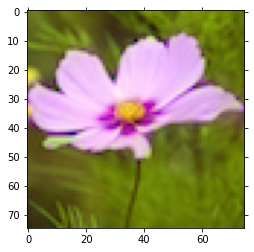

In [43]:
save_img('colorized_flower.png', R.value, G.value, B.value)